# This is a project 

Scenario:  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
  
Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   
  
Requirements  
  
You are required to use the dataset contained within the file “board_games.csv” and then answer the following questions:  
  
Part 1: (Column Names are denoted by quotation marks)  (30 marks)
  
•	What are the top 5 “average rated” games?  
•	Is there a correlation between the “users_rated” and the “max_playtime”?  
•	What is the distribution of game categories? (You may not use a barchart)
•	Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  
•	What are the 5 most common “mechanics” in the dataset?  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set()
%matplotlib inline

In [2]:
# read the data

df= pd.read_csv('board_games.csv')

# first 5 rows
df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [4]:
df.shape

(10532, 22)

We observe the data set contain 10532 rows and 22 features, the are mix of numbers and string values and some of the columns are missing data.

# Checking missing values

In [5]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("board_games.csv", na_values = missing_value_formats)

In [6]:
df.isnull().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

## What are the top 5 “average rated” games?

I will calculate the average rating for each game and then organise the games based on their average ratings.

In [7]:
# Group the data by game title and calculate the average rating
average_ratings = df.groupby('name')['average_rating'].mean()


In [8]:
# Sort the games by average rating in descending order
top_games = average_ratings.sort_values(ascending=False).head(5)


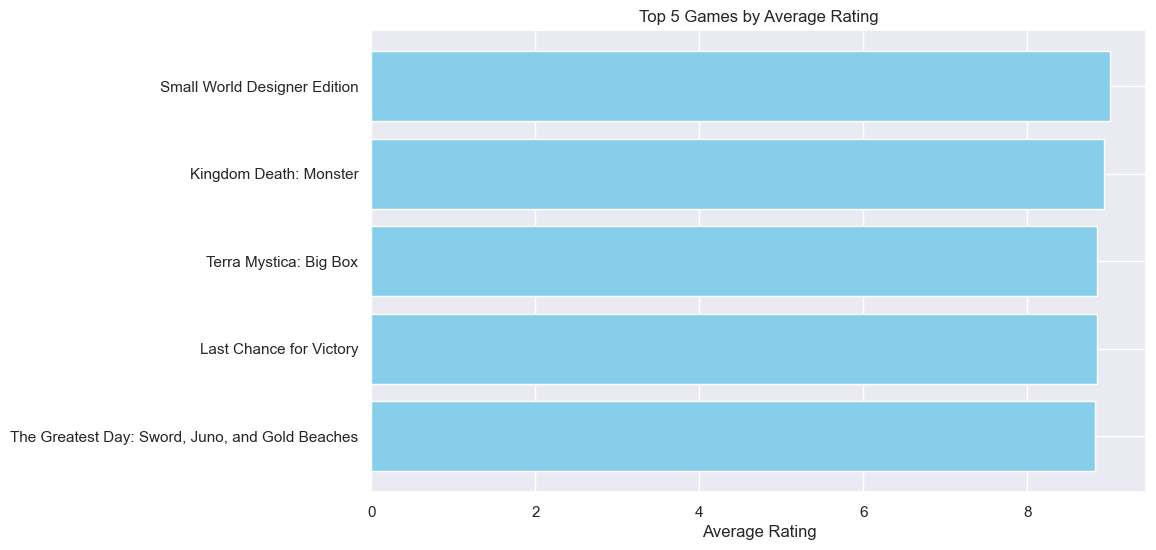

In [9]:
# Extract the game titles and average ratings from the top_games DataFrame
game_titles = top_games.index
average_ratings = top_games.values

# Create a bar plot to visualize the top 5 games
plt.figure(figsize=(10, 6))
plt.barh(game_titles, average_ratings, color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 5 Games by Average Rating')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest rated game at the top
plt.show()


The best games rated are 

Small World Designer Edition                       
Kingdom Death: Monster                             
Terra Mystica: Big Box                             
Last Chance for Victory                            
The Greatest Day: Sword, Juno, and Gold Beaches

# Is there a correlation between the “users_rated” and the “max_playtime”?

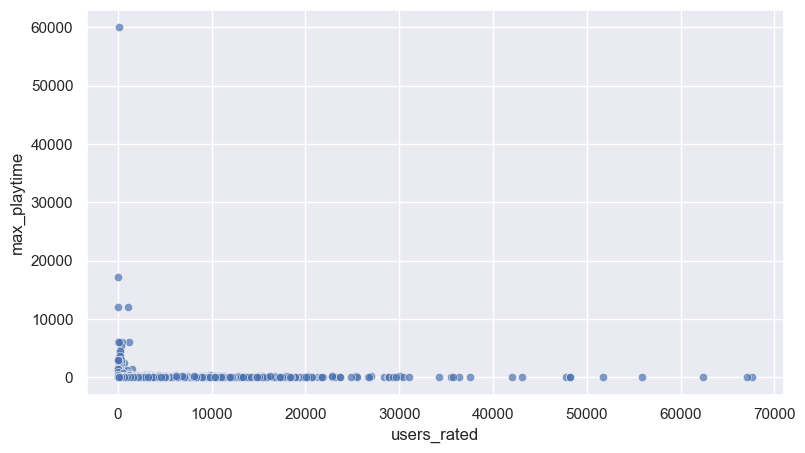

In [11]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df, x='users_rated', y='max_playtime',alpha=0.7);